#  UNLOCKING YOUTUBE CHANNEL PERFORMANCE SECRET:

# CREATE LIBRARY:

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. LOAD THE DATASET:

In [53]:
df = pd.read_csv('youtube_channel_real_performance_analytics.csv')

In [55]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [56]:
df.shape

(364, 70)

In [57]:
df.columns

Index(['ID', 'Video Duration', 'Video Publish Time', 'Days Since Publish',
       'Day', 'Month', 'Year', 'Day of Week', 'Revenue per 1000 Views (USD)',
       'Monetized Playbacks (Estimate)', 'Playback-Based CPM (USD)',
       'CPM (USD)', 'Ad Impressions', 'Estimated AdSense Revenue (USD)',
       'DoubleClick Revenue (USD)', 'YouTube Ads Revenue (USD)',
       'Watch Page Ads Revenue (USD)', 'YouTube Premium (USD)',
       'Transaction Revenue (USD)', 'Transactions',
       'Revenue from Transactions (USD)', 'Reactions', 'Chat Messages Count',
       'Reminders Set', 'Stream Hours', 'Remix Views', 'Remix Count',
       'Subscribers from Posts', 'New Comments', 'Shares', 'Like Rate (%)',
       'Dislikes', 'Likes', 'Unsubscribes', 'New Subscribers',
       'Returned Items (USD)', 'Unconfirmed Commissions (USD)',
       'Approved Commissions (USD)', 'Orders', 'Total Sales Volume (USD)',
       'End Screen Click-Through Rate (%)', 'End Screen Impressions',
       'End Screen Clicks', 

In [59]:
df.describe()

,ID,Video Duration,Days Since Publish,Day,Month,Year,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),Playback-Based CPM (USD),CPM (USD),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,3.640000e+02,364.000000
mean,181.500000,664.239011,8.406593,15.807692,6.642857,2018.736264,0.112283,8934.711538,1.553734,1.059005,...,0.824176,0.008242,45.970989,285.612637,128800.101648,10058.965455,321.024725,8.852052,9.595286e+05,7.914615
std,105.221988,330.646183,15.371239,8.924004,3.421521,2.530629,0.179668,12967.843236,1.078549,0.728380,...,9.053369,0.090534,12.457470,116.595678,118209.844270,9516.160361,444.594763,13.414650,1.180519e+06,2.903383
min,0.000000,9.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,15.050000,8.000000,2461.000000,12.697900,-3.000000,0.000000,3.222800e+04,0.620000
25%,90.750000,496.000000,3.000000,8.000000,4.000000,2017.000000,0.015000,349.500000,0.817750,0.522000,...,0.000000,0.000000,40.252500,233.750000,27160.500000,2759.404250,41.000000,0.443250,1.317082e+05,6.420000
50%,181.500000,613.000000,5.000000,16.000000,7.000000,2018.000000,0.050000,3564.000000,1.540500,1.155500,...,0.000000,0.000000,45.465000,286.500000,101950.500000,8102.962950,180.000000,4.285000,6.204065e+05,8.395000
75%,272.250000,786.500000,9.000000,23.000000,10.000000,2021.000000,0.143500,13579.250000,2.025250,1.458750,...,0.000000,0.000000,51.010000,344.250000,198169.500000,14084.498550,421.250000,11.476250,1.368464e+06,9.920000
max,363.000000,2311.000000,260.000000,31.000000,12.000000,2024.000000,1.600000,100566.000000,7.385000,6.295000,...,100.000000,1.000000,117.300000,776.000000,670990.000000,53794.658700,3728.000000,103.117000,1.270226e+07,27.660000


In [60]:
df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


# 3. DATA CLEANING:
  #   HANDLE MISSING VALUES:

<Axes: >

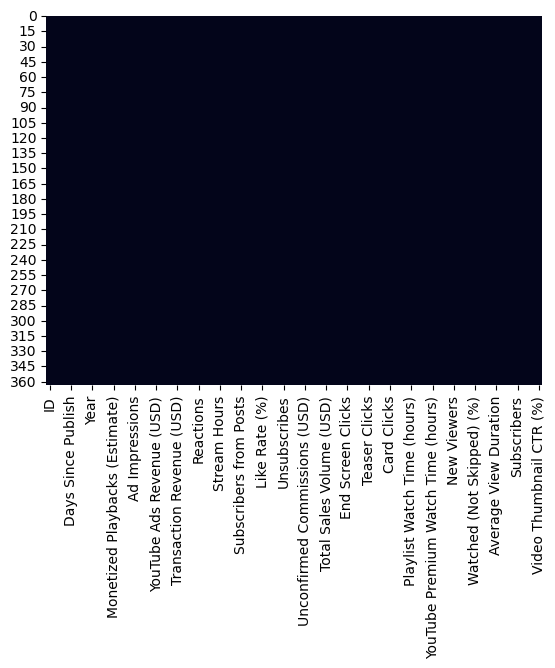

In [63]:
plt.figure(figure=(20,20))
sns.heatmap(df.isnull(), cbar=False)

In [64]:
df.isnull().sum()

ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64

In [66]:
# Fill or drop null values
df = df.dropna() # Drop rows with missing values (for simplicity)

# EXPLORATORY DATA ANALYSIS:

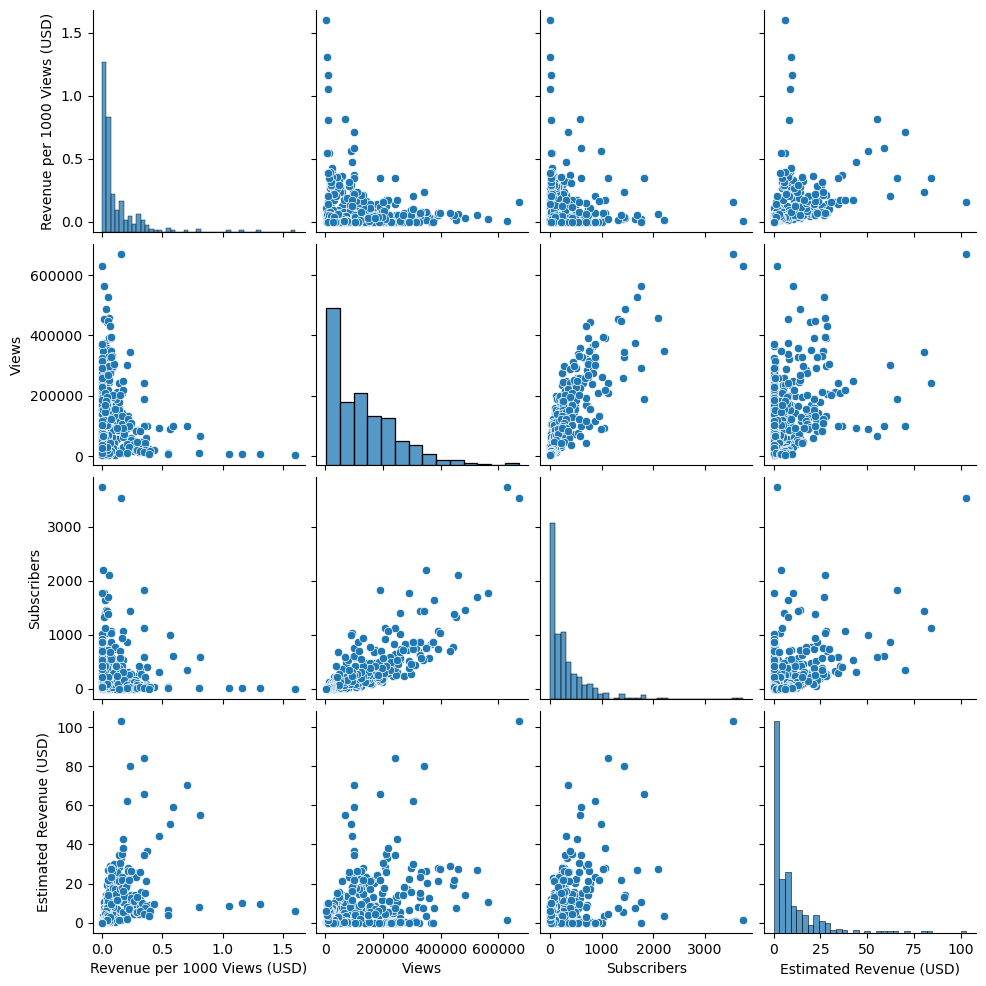

In [72]:
# Pairplot to visualize relationships
sns.pairplot(df[['Revenue per 1000 Views (USD)', 'Views',
'Subscribers', 'Estimated Revenue (USD)']])
plt.show()

# TOP PERFORMER BY REVENUE:

In [74]:
top_videos = df.sort_values(by='Estimated Revenue (USD)',
ascending=False).head(10)
print(top_videos[['ID', 'Estimated Revenue (USD)', 'Views',
'Subscribers']])

      ID  Estimated Revenue (USD)     Views  Subscribers
228  228                  103.117  670990.0       3538.0
257  257                   83.979  241060.0       1125.0
251  251                   80.265  343319.0       1437.0
289  289                   70.247   99196.0        350.0
278  278                   65.978  188324.0       1824.0
260  260                   62.047  302999.0        866.0
293  293                   59.058  101025.0        602.0
294  294                   55.040   67556.0        581.0
290  290                   50.344   89284.0        995.0
284  284                   44.228   93487.0        305.0


# DATA VISULAIZATION:

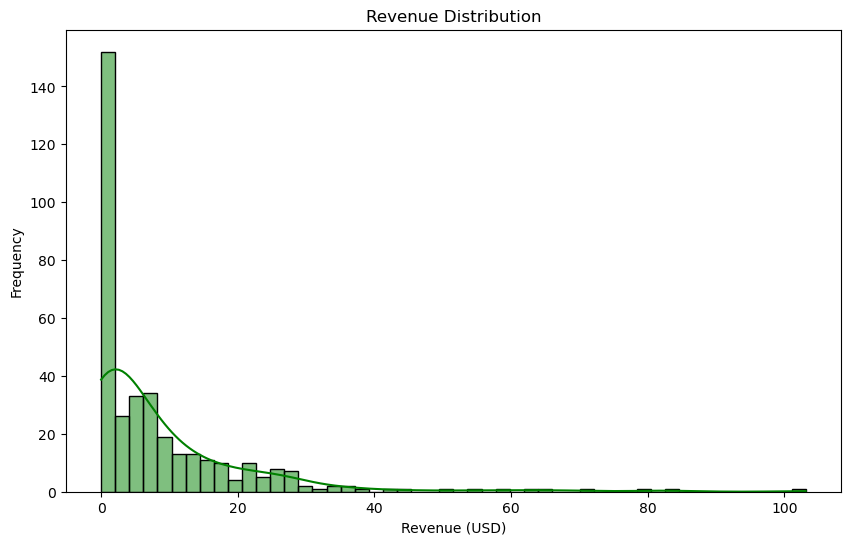

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated Revenue (USD)'], bins=50,
kde=True, color='green')
plt.title("Revenue Distribution")
plt.xlabel("Revenue (USD)")
plt.ylabel("Frequency")
plt.show()

# REVENUE VS VIEWS:

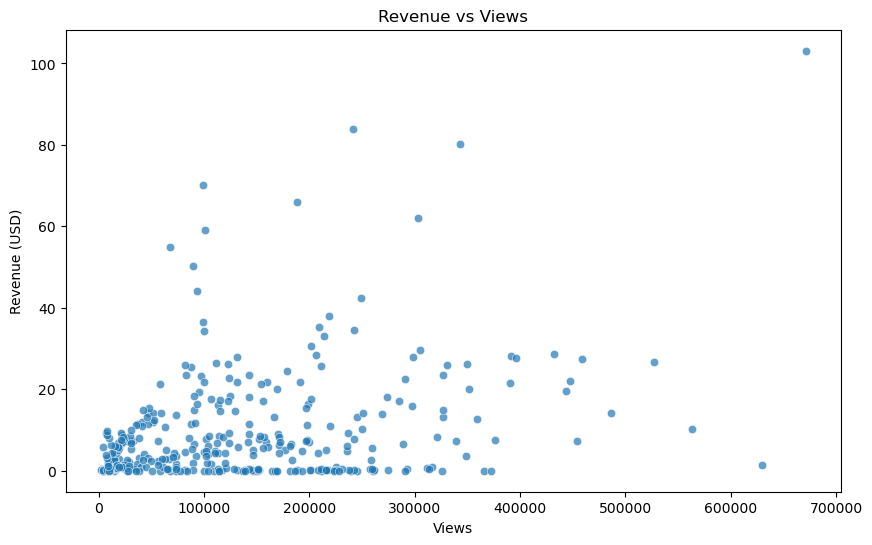

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Views'], y=df['Estimated Revenue (USD)'], alpha=0.7)
plt.title("Revenue vs Views")
plt.xlabel("Views")
plt.ylabel("Revenue (USD)")
plt.show()

# CATEGORICAL FEATURE ENGINEERING:

In [89]:
df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%),Revenue per View
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66,0.000024
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85,0.000056
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07,0.000014
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60,0.000004
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62,0.000000


In [90]:
df = pd.get_dummies(df.drop(['ID'], axis =1))

In [91]:
df = df*1

In [92]:
df.head()

,Video Duration,Days Since Publish,Day,Month,Year,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),Playback-Based CPM (USD),CPM (USD),Ad Impressions,...,Video Publish Time_2024-09-16 00:00:00,Video Publish Time_2024-09-25 00:00:00,Video Publish Time_2024-10-18 00:00:00,Day of Week_Friday,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday
0,201.0,0,2,6,2016,0.024,723.0,1.386,1.021,981.0,...,0,0,0,0,0,0,0,1,0,0
1,391.0,8,10,6,2016,0.056,727.0,1.612,1.361,861.0,...,0,0,0,1,0,0,0,0,0,0
2,133.0,4,14,6,2016,0.014,76.0,2.105,1.818,88.0,...,0,0,0,0,0,0,0,0,1,0
3,14.0,15,29,6,2016,0.004,18.0,1.667,0.857,35.0,...,0,0,0,0,0,0,0,0,0,1
4,45.0,2,1,7,2016,0.000,0.0,0.000,0.000,0.0,...,0,0,0,1,0,0,0,0,0,0


In [95]:
X = df.drop(['Day of Week_Friday'], axis =1)
y = df['Day of Week_Friday']

In [96]:
X.head()

,Video Duration,Days Since Publish,Day,Month,Year,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),Playback-Based CPM (USD),CPM (USD),Ad Impressions,...,Video Publish Time_2024-09-01 00:00:00,Video Publish Time_2024-09-16 00:00:00,Video Publish Time_2024-09-25 00:00:00,Video Publish Time_2024-10-18 00:00:00,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday
0,201.0,0,2,6,2016,0.024,723.0,1.386,1.021,981.0,...,0,0,0,0,0,0,0,1,0,0
1,391.0,8,10,6,2016,0.056,727.0,1.612,1.361,861.0,...,0,0,0,0,0,0,0,0,0,0
2,133.0,4,14,6,2016,0.014,76.0,2.105,1.818,88.0,...,0,0,0,0,0,0,0,0,1,0
3,14.0,15,29,6,2016,0.004,18.0,1.667,0.857,35.0,...,0,0,0,0,0,0,0,0,0,1
4,45.0,2,1,7,2016,0.000,0.0,0.000,0.000,0.0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Day of Week_Friday, dtype: int32

In [98]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [100]:
X_train.shape

(273, 431)

In [103]:
X_test.shape

(91, 431)

# FEATURE SCALING:

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler=StandardScaler()

In [107]:
# Fit only training data
scaler.fit(X)

StandardScaler()

In [108]:
#now apply the transformation to data:
X_trian=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [111]:
X_trian[:5]

array([[-1.87539249, -0.41736465, -1.66159435, ..., -0.32616404,
        -0.44426166, -0.43089181],
       [-0.02798075, -0.1567802 , -0.65169025, ..., -0.32616404,
        -0.44426166,  2.32076817],
       [ 0.20218858, -0.22192631, -1.54938278, ..., -0.32616404,
        -0.44426166, -0.43089181],
       [-0.35506348, -0.1567802 , -1.32495965, ..., -0.32616404,
        -0.44426166, -0.43089181],
       [-0.41260582, -0.41736465,  1.25590638, ..., -0.32616404,
        -0.44426166, -0.43089181]])

# Training model using K-NN

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [113]:
parameters={'n_neighbors':[3,5,11,19],
           'weights':['uniform','distance'],
           'metric':['minikowski','manhattan']}

In [114]:
clf=GridSearchCV(KNeighborsClassifier(), parameters, cv=3, verbose=1, n_jobs=-1)

In [115]:
clf.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minikowski', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [116]:
clf.best_score_

0.8644688644688645

In [119]:
clf.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

In [120]:
clf=KNeighborsClassifier(metric='manhattan', n_neighbors=11,weights='distance')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [125]:
model = RandomForestRegressor(n_estimators=100,
random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [126]:
# Predict on test data
y_pred = model.predict(X_test)

In [127]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.35
R-squared: -1.32


In [121]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [122]:
confusion_matrix(y_test, y_pred)

array([[74,  0],
       [17,  0]], dtype=int64)

In [123]:
accuracy_score(y_test,y_pred)

0.8131868131868132

In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        74
           1       0.00      0.00      0.00        17

    accuracy                           0.81        91
   macro avg       0.41      0.50      0.45        91
weighted avg       0.66      0.81      0.73        91

